# Trabajo Final - Lectura y analisis de Electrocardiograma

Primero que nada, se dejó la siguiente celda de codigo en caso de que no se disponga del archivo dado en el Collab de el trabajo integrador:

In [1]:
import requests

def wget(url):
    r = requests.get(url, allow_redirects=True)
    with open(url[url.rfind('/') + 1::], 'wb') as f:
        f.write(r.content)

wget("https://raw.githubusercontent.com/IEEESBITBA/Curso-Python/master/Clase_4_datos/electrocardiograma.xlsx")

***

Con el .xlsx descargado, se decidió hacer un grafico rapido del archivo utilizando python junto con la libreria pandas y matplot para tener una mejor idea y comprensión de los datos:

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.signal as scp

#Leo el excel y lo guardo en la variable File
File=pd.read_excel("electrocardiograma.xlsx")
#Guardo en otra variable el archivo pero en formato dictionary

xEC=list()  #valores en X del grafico
yEC=list()  #valores en Y del grafico

#Se guarda los valores de tiempo y señal en los ejes X Y, respectivamente
for i in range(len(File['señal'])):
    #Guardo la informacion del indice x del archivo en una variable auxiliar
    aux=File.loc[i]
    #Le agrego al eje Y el indice i de la columna de señales
    yEC.append(aux['señal']) 
    #Le agrego al eje X el indice i de la columna de tiempo
    xEC.append(aux['tiempo'])  
    
#Le doy un poco de formato al grafico
plt.figure(figsize=(20,8))
plt.title('Electrocardiograma')
plt.xlabel('Tiempo (seg)')
plt.ylabel('Señal')

#Grafico los ejes X Y y la data recibida del excel
plt.plot(xEC,yEC,'b-')

plt.show()

<Figure size 2000x800 with 1 Axes>

Junto con el archivo se dieron diferentes datos y pautas:
* Las mediciones fueron tomadas con una frecuencia de 360Hz
* Se debe calcular los picos del grafico y marcarlos
* Se debe calcular la frecuencia cardiaca del paciente medida en latidos por minuto
* Determinar el estado del paciente mientras fue realizado el analisis (Si estaba durmiendo, reposando o realizando actividad fisica)
* Realizar las preguntas necesarias acerca del paciente para poder calcular el nivel de actividad fisica del paciente mientras se realizaron las mediciones
* Almacenar los datos recopilados en un archivo de texto (.txt)

## Detección de los picos
Una vez graficado el excel y establecido los objetivos a cumplir se prosiguió a detectar y graficar los picos del grafico utilizando la libreria [scipy.signal](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.find_peaks.html) que se nos fue facilitada en las consignas del trabajo

Dentro de la libreria existe un *metodo* llamado ".find_peaks()" cuya función es, como su nombre lo indica, encontrar picos en señales. Para utilizarla se debe pasar como parametro **como minimo** la columna de señales (previamente guardada en la lista yEC), sin embargo se puede definir otros parametros dentro de la función para realizar un filtro en el analisis de la señal para evitar detectar falsos picos.

Dentro de dichos parametros se encuentra distance,height, threshold, prominence, nos enfocaremos en el ultimo ya que es la mas apropiada para este caso.

A continuacion se definen dos funcionen que serviran para preparar los graficos, uno para la señal y otro para los picos:

In [3]:
import matplotlib.pyplot as plt
import scipy.signal as scp

#funcion para preparar el plot de un grafico
def ploteo(x,y,lt=0,xl=0,yl=0,tl=0): #eje x, eje y, tipo de linea,label x,label y, titulo del grafico
    #Si un titulo para el grafico se declarado lo agrego
    if tl:
        plt.title(tl)
    #Si un label para el eje x fue declarado, lo agrego
    if xl:
        plt.xlabel(xl)
    #Si un label para el eje y fue declarado, lo agrego
    if yl:
        plt.ylabel(yl)
    #Si se requiere un tipo de linea en especifico se lo agrego
    if lt:
        plt.plot(x,y,lt)
    #Caso contrario, uso el tipo de linea predeterminado
    else:
        plt.plot(x,y)

#funcion para detectar los picos de una señal y añadirlos al plot
def pk_plot(signal,indices,p=0): #eje y, eje x, valor de prominencia
    ypicos=list()
    xpicos=list()
    if p:
        picos=scp.find_peaks(signal,prominence=p)
    else:
        picos=scp.find_peaks(signal)
    index=picos[0]
    for i in index:
        xpicos.append(indices[i])
    
    for h in range(len(xpicos)):
        ypicos.append(signal[index[h]])
    plt.plot(xpicos,ypicos,"ro")
    return index

***
Ya habiendo declarado las funciones, a continuación se mostrará un ejemplo de como puede variar la detección de picos en función del parametro p:

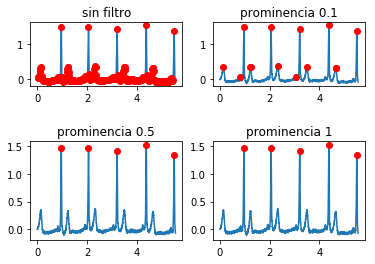

In [4]:
#Leo el excel y lo guardo en la variable File
File=pd.read_excel("electrocardiograma.xlsx")
#Guardo en otra variable el archivo pero en formato dictionary
EleCardio=File.to_dict('list')

xEC=list()  #Eje X del grafico
yEC=list()  #Eje Y del grafico

#Se guarda los valores de tiempo y señal en los ejes X Y, respectivamente
for i in range(len(File['señal'])):
    #Guardo la informacion del indice x del archivo en una variable auxiliar
    aux=File.loc[i]
    #Le agrego al eje Y el indice i de la columna de señales
    yEC.append(aux['señal']) 
    #Le agrego al eje X el indice i de la columna de tiempo
    xEC.append(aux['tiempo'])  

#Se hace un grafico con picos sin filtro
plt.subplot(3,2,1)
ploteo(xEC,yEC,tl="sin filtro")
pk_plot(yEC,xEC)

#Se hace un grafico con picos el filtro de prominencia=0.1
plt.subplot(3,2,2)
ploteo(xEC,yEC,tl="prominencia 0.1")
pk_plot(yEC,xEC,0.1)

#Se hace un grafico con picos el filtro de prominencia=0.5
plt.subplot(2,2,3)
ploteo(xEC,yEC,tl="prominencia 0.5")
pk_plot(yEC,xEC,0.5)

#Se hace un grafico con picos el filtro de prominencia=1
plt.subplot(2,2,4)
ploteo(xEC,yEC,tl="prominencia 1")
pk_plot(yEC,xEC,1)
    
#Imprimo todos los graficos juntos
plt.show()

Claramente en este caso, los valores que mejor resultados dieron fueron con la prominencia igual a 0,5 o 1 por lo que se adoptará este ultimo valor para hacer el grafico final y marcar los picos maximos locales de la señal:

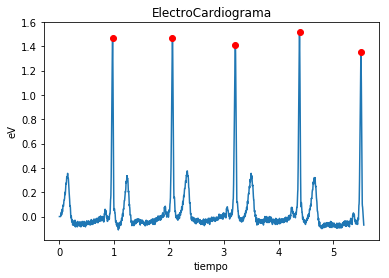

Se detectaron  5  picos


In [5]:
#Leo el excel y lo guardo en la variable File
File=pd.read_excel("electrocardiograma.xlsx")
#Guardo en otra variable el archivo pero en formato dictionary
EleCardio=File.to_dict('list')

xEC=list()  #Eje X del grafico
yEC=list()  #Eje Y del grafico
tLabel=list()
xlinea=list()
ylinea=list()

#Se guarda los valores de tiempo y señal en los ejes X Y, respectivamente
for i in range(len(File['señal'])):
    #Guardo la informacion del indice x del archivo en una variable auxiliar
    aux=File.loc[i]
    #Le agrego al eje Y el indice i de la columna de señales
    yEC.append(aux['señal']) 
    #Le agrego al eje X el indice i de la columna de tiempo
    xEC.append(aux['tiempo'])  

#Se preparan los graficos de la señal y la deteccion de picos y guardamos la cantidad de picos leidos en una variable
#para asegurar que no hayan picos escondidos uno cerca del otro
ploteo(xEC,yEC,0,xl='tiempo',yl='eV',tl='ElectroCardiograma')
cant_picos=len(pk_plot(yEC,xEC,1))
    
plt.show()
print("Se detectaron ",cant_picos," picos")

Ya fue completado el primer punto, graficar la señal dada y marcar los picos maximos.

El siguiente paso a realizar es calcular en base a los datos dados la frecuencia cardiaca del paciente, sin embargo a simple vista no hay nada que indique que estos datos.

## Calculo de frecuencia cardiaca
Tras realizar una busqueda en internet se encontró la siguiente [pagina web](https://www.my-ekg.com/como-leer-ekg/frecuencia-cardiaca.html) donde se explica como realizar mediciones de frecuencia cardiaca en base a un electrocardiograma(EKG) *tradicional*

### Calculo de la frecuencia cardiaca
Una de las formas de medir la frecuencia cardiaca es medir el tiempo desde que late el corazon hasta que vuelve a realizar otro latido, una vez conocido este periodo, se debe realizar la siguiente formula

FC=60/T

Siendo:
* FC= frecuencia cardiaca
* 60= el equivalente de un minuto en segundos
* T= periodo entre latido y latido **medido en segundos**

Pero aun queda resolver como detectar cuando sucede un latido utilizando la información obtenida. Acá es donde surge la importancia de la pagina mencionada anteriormente, dentro de ella es explicado el *intervalo R-R* medido en un EKG. 
![IntervaloR-R](https://www.my-ekg.com/imag/heart-rate.png)
Dicho intervalo es la distancia entre una onda R y la siguiente, dicha onda representa el latido del corazon y en un EKG se ve representado como los **picos maximos locales** en la señal

Entonces ahora sabemos que los picos maximos graficados en el punto anterior representan los latidos del paciente.

In [6]:
#Haremos una funcion sencilla para calcular la frecuencia cardiaca promedio, 
# toma como parametro todos los intervalos medidos

def F_Car(periodo):
    #Primero guardaremos las frecuencias parciales en una lista
    frecuencia=list()
    
    prom=float()
    
    #Hacemos el calculo de frecuencia con cada elemento del parametro recibido y lo guardamos en la lista "frecuencia"
    for x in periodo:
        frecuencia.append(float(60/x))
    #acumulamos todas las frecuencias parciales
    for y in frecuencia:
        prom+=y
    #Y las dividimos sobre la cantidad de frecuencias obtenidas y obtenemos el promedio final
    prom/=len(frecuencia)
    
    #retornamos el valor del promedio
    return prom

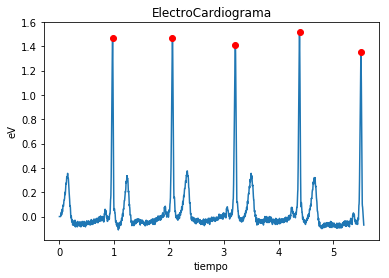

Se obtuvieron los siguientes intervalos entre pico y pico
 [1.0916666666666663, 1.1472222222222221, 1.1722222222222234, 1.1194444444444436] 

La frecuencia promedio es  53.011230800844885


In [7]:
ploteo(xEC,yEC,0,xl='tiempo',yl='eV',tl='ElectroCardiograma')
picos=pk_plot(yEC,xEC,1)
plt.show()

#Creamos una lista donde se guardaran todos los intervalos
periodo=list()

#Se itera el for por la cantidad de elementos en "picos" - 1 
for p in range(len(picos)-1):
    p1=xEC[picos[p]]    #p1 es el tiempo inicial del intervalo
    p2=xEC[picos[p+1]]  #p2 es el tiempo final del intervalo
    dif=p2-p1           #Calculo la distancia de del intervalo restando p1 de p2
    periodo.append(dif) #Agrego el valor en la lista periodos

# imprimimos los intervalos obtenidos
print("Se obtuvieron los siguientes intervalos entre pico y pico\n",periodo,'\n')

#Llamamos la funcion F_Car para calcular la frecuencia cardiaca promedio
print("La frecuencia promedio es ",F_Car(periodo))

Ya sabemos que la frecuencia cardiaca del paciente es alrededor de 53 latidos por minutos, completamos otra consigna
***


## Reconocimiento del estado del paciente
### Frecuencia Cardiaca en distintos niveles de actividad
Siguiendo los [criterios de la frecuencia cardiaca](hhttps://www.desfibrilador.com/frecuencia-cardiaca-del-corazon/) sabemos que una persona adulta promedio tiene una **FCmax de entre 200 a 190 ppm (pulsaciones por minuto)** cuando se encuentra haciendo **actividad fisica una persona aumenta su frecuencia cardiaca llevandola entre 50% a 70% su FCmax**, dependiendo la intensidad de la misma, cuando la persona se encuentra en **reposo parcial (sentado o acostado despierto) la frecuencia baja alrededor de los 60 ppm, o sea, alrededor del 49% al 30% ** Y finalmente cuando una **persona duerme esta frecuencia se encuentra alrededor de los 50ppm**.
Se aclara, estos parametros son para una persona **adulta sana** pero calculando la FCmax de una persona podemos determinar los valores de cada tipo de actividad, sintetizando:
1. Frecuencia cardiaca activa: 
    * Actividad intensa>70% de FCmax
    * 70% de FCmax > Actividad moderada > 60% de FCmax
    * 60% de FCmax > Actividad ligera > 50% de FCmax
2. Frecuencia cardiaca en reposo:
    * 50% de FCmax > Paciente en reposo despierto > 30% de FCmax
    * 30% de FCmax > Paciente durmiendo


### Cálculo de Frecuencia Cardiaca máxima
Ya se sabe cuanto varia la FC respecto de la FCmax en funcion de que tan activo estaba paciente al momento de realizarse una medición, pero aun sigue en incognito el valor de FCmax, ya que esta varía en funcion a las caracteristicas del paciente.
Existe un calculo de FCmax referenciado en [otra seccion del articulo de WikiPedia](https://es.wikipedia.org/wiki/Frecuencia_card%C3%ADaca#Ecuaciones_m%C3%A1s_modernas) donde se calcula la FCmax en base al sexo, la edad y peso(en kg) del paciente:

| Sexo |FCmax|
|------|------|
|Masculino| [(210 - (0,5 * edad en años)) - (0,01 * peso en kg) + 4]|
|Femenino| [(210 - (0,5 * edad en años)) - (0,01 * peso en kg)]|

Ya sabiendo esto se prosigue a realizar una función que analice la información del paciente y retorne el estado del mismo al momento de ser realizada la medición

In [8]:
#Recibe la frecuencia promedio y el sexo, edad y peso del paciente
def estado(Frec,Sexo,Edad,Peso,P=0):
    Fmax=0
    #Dependiendo el sexo del paciente se calcula la Frecuencia cardiaca Maxima en base a la edad y peso
    if Sexo=='M':
        Fmax=((210-(0.5*Edad))-(0.01*Peso)+4)
    if Sexo=='F':
        Fmax=((210-(0.5*Edad))-(0.01*Peso))
    #Se obtiene que porcentaje representa la frecuencia medida respecto de la frecuencia maxima
    Porcentaje=(Frec*100)/Fmax
    
    #Podemos imprimir la Fmax calculada y mostrar que porcentaje representa la frecuencia medida si es necesario
    if P:
        print("Fmax= ",Fmax,"\nPorcentaje de la frecuencia dada respecto a Fmax: ",Porcentaje,"%")
    
    
    #Si el porcentaje es menor o igual a 70 
    if Porcentaje<=70:
        #Si el porcentaje es menor a 60
        if Porcentaje<60:
            if Porcentaje<50:
                if Porcentaje<30: #Si es menor a 30
                    return ("Paciente durmiendo")
                #Si está entré 49 y 30
                else:
                    return ("Paciente en reposo")
            #Si el porcentaje está entre 50 y 59
            else:
                return('Paciente realizando actividad ligera')
        #Si el porcentaje esta entre 60 y 69
        else:
            return ("Paciente realizando actividad fisica moderada")
    #Si el porcentaje es mayor a 70
    else:
        return ("Paciente realizando actividad fisica intensa")

#Pruebas rapidas de la funcion (descomentar las lineas de codigo)
#Llamo la funcion con datos propios
print(estado(60,'M',19,54),"\n\n")
#Llamo la funcion con diferentes valores
print(estado(80,'F',39,60,1),"\n\n")
#Llamo la funcion con los mismo valores que la anterior pero distinta edad
print(estado(80,'F',100,60,1),"\n\n")

Paciente durmiendo 


Fmax=  189.9 
Porcentaje de la frecuencia dada respecto a Fmax:  42.1274354923644 %
Paciente en reposo 


Fmax=  159.4 
Porcentaje de la frecuencia dada respecto a Fmax:  50.18820577164366 %
Paciente realizando actividad ligera 




***

Habiendo creado la funcion necesaria, debemos unificarla con el programa anterior pidiendo al usuario que ingrese la información del paciente, es probable que quien ingrese la información tenga errores que ocasionen que el programa falle, debemos evitar en la medida de lo posible estos errores, entonces haremos una funcion que filtre la entrada del usuario:

Para está función se buscó acerca de los bloques [try y except](https://www.w3schools.com/python/python_try_except.asp) para detectar errores y actuar en consecuencia

In [9]:
#Esta funcion tendra el objetivo de pedir al usuario que reingrese la informacion pedida hasta que ingrese valores aptos
#Tambien puede corregir algunos errores predecibles
def GGD(dato):#GGD: Get good data
    data=0
    #Si se requiere el dato del sexo
    if dato=='sexo':
        #listas con diferentes formas de referirse a una persona de sexo masculino o femenino
        V_sexM=['M','HOMBRE','MACHO','CHICO','PIBE','VARON','MASCULINO']
        V_sexF=['F','MUJER','HEMBRA','CHICA','PIBA','FEMENINO','FEMENINA']
        
        
        tildes=['Á','É','Í','Ó','Ú']
        vocales=['A','E','I','O','U']
        
        while 1:
            data=input('Ingrese sexo del paciente (M)asculino/(F)emenino: ')
            try:
                #Si puedo transformar el Sexo en numeros es porque se ingresó un valor numerico
                data=int(data)
                #Se pide el reingreso del sexo en palabras
                print('Ingrese sexo en palabras')
            #Si sucede un ValueError(Por tratar de transformar palabras en numeros)
            except ValueError:
                #paso la entrada a mayusculas
                data=data.upper()
                
                #Chequeo cada caracter de la palabra introducida
                for caracter in range(len(tildes)):
                    #Si alguna de las vocales tiene tilde, la reemplazo por la vocal sin tilde
                    if tildes[caracter] in data:
                         data=data.replace(tildes[caracter],vocales[caracter])
                        
                #Si la entrada esta en las variables de sexo masculino
                if (data in V_sexM):
                    #Cambio la entrada al valor valido para la funcion
                    data='M'
                    #Se guardó un valor valido asi que se rompe la condición de while
                    break
                #Si la entrada esta en las variables de sexo femenino
                elif (data in V_sexF):
                    #Cambio la entrada al valor valido para la funcion
                    data='F'
                    #Se guardó un valor valido asi que se rompe la condición de while
                    break
                #Si no se reconoce la entrada entonces se pide reingreso del sexo
                else:
                    print('Traducí porfa, soy ingresante')
                    
    #Si se requiere el dato de edad o peso
    if dato=='edad' or dato=='peso':
        while True:
            if dato=='edad':
                data=input(('Ingrese edad del paciente: '))
            else:
                data=input(('Ingrese el peso del paciente en kg: '))
            try:
                #Se reemplaza la coma por un punto en caso de que se haya ingresado una variable con decimales
                if ',' in data:
                    data=data.replace(',','.')
                #Se trata de transformar la data en float
                data=float(data)
                #Si se logra entonces el dato es valido, se rompe el bucle
                break
            #Si se detecta un error
            except ValueError:
                #Se pide reingreso de la información
                print("Ingrese la información requerida en numeros")
    #Una vez obtenido un valor valido, se retorna el valor obtenido
    return data

#Llamo a la funcion para probarla
# print(GGD('sexo'))
# print(GGD('edad'))
# print(GGD('peso'))

In [10]:
#Llamamos la funcion F_Car para calcular la frecuencia cardiaca promedio
F_Prom=F_Car(periodo)
print("La frecuencia promedio es ",F_Prom)


sexo=GGD('sexo')
print(sexo)
edad=GGD('edad')
print(edad)
peso=GGD('peso')
print(peso)

print(estado(F_Prom,sexo,edad,peso,1))

La frecuencia promedio es  53.011230800844885
Ingrese sexo del paciente (M)asculino/(F)emenino: m
M
Ingrese edad del paciente: 100
100.0
Ingrese el peso del paciente en kg: 120
120.0
Fmax=  162.8 
Porcentaje de la frecuencia dada respecto a Fmax:  32.56218108160005 %
Paciente en reposo


***

## Guardar archivo información en archivo ".txt"
Ya habiendo obtenido todos los datos pedidos solo quedá guardar toda dentro de un archivo de texto (.txt).
Cada vez que se corra el script de forma exitosa se **añadiran** los resultados e información recopilada al final de un archivo de texto

In [11]:
mas='SI'
while mas=='SI':
    #Obtenemos las variables necesarias
    sexo=GGD('sexo')
    print(sexo)
    edad=GGD('edad')
    print(edad)
    peso=GGD('peso')
    print(peso)
    
    #obtenemos el nivel de actividad del paciente
    actividad=estado(F_Prom,sexo,edad,peso,1)
    print(actividad)
    
    #Abrimos el archivo como Analisis, si el archivo no existe, lo creamos
    with open('Analisis.txt','a+') as analisis:
        #Preparamos una string con la informacion que queremos guardar en el archivo con el siguiente formato:
        #Analisis c_analisis
        #Sexo: sexo
        #Edad: edad
        #Peso: peso
        #Frecuencia cardiaca: F_Prom
        #Estado del paciente durante la medición: actividad
        escritura="Analisis "
        escritura+="\nSexo: "+ sexo
        escritura+="\nEdad: "+ str(int(edad))
        escritura+="\nPeso: "+str(peso)
        escritura+="\nFrecuencia cardiaca: "+str("%.2f" %F_Prom)
        escritura+="\nEstado del paciente durante la medición: "+actividad+"\n\n"
        
        #Escribo en el archivo el contenido de escritura
        analisis.write(escritura)
    #Una vez finalizado el with, se cierra el archivo
    #Y se pregunta si se quiere cargar otro set de datos
    mas=input("\nIngrese \"SI\" si desea seguir realizando pruebas con diferentes datos\nIngrese cualquier otro dato para detener las pruebas\n ")
    mas=mas.upper()
    if mas=='420' or mas=='69': 
        print('Nice')
        mas='SI'
    elif mas=='never gonna give you up':
        print('never gonna let you down')
        mas='SI'
    if not(mas=='SI'):
        print('Fin del programa')


Ingrese sexo del paciente (M)asculino/(F)emenino: m
M
Ingrese edad del paciente: 19
19.0
Ingrese el peso del paciente en kg: 60
60.0
Fmax=  203.9 
Porcentaje de la frecuencia dada respecto a Fmax:  25.99864188369048 %
Paciente durmiendo

Ingrese "SI" si desea seguir realizando pruebas con diferentes datos
Ingrese cualquier otro dato para detener las pruebas
 
Fin del programa
